In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy import stats as ss
from collections import Counter
import math
from sklearn.feature_selection import mutual_info_classif
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
%matplotlib inline

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving report.csv to report.csv


In [ ]:
import io

In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['report.csv']))

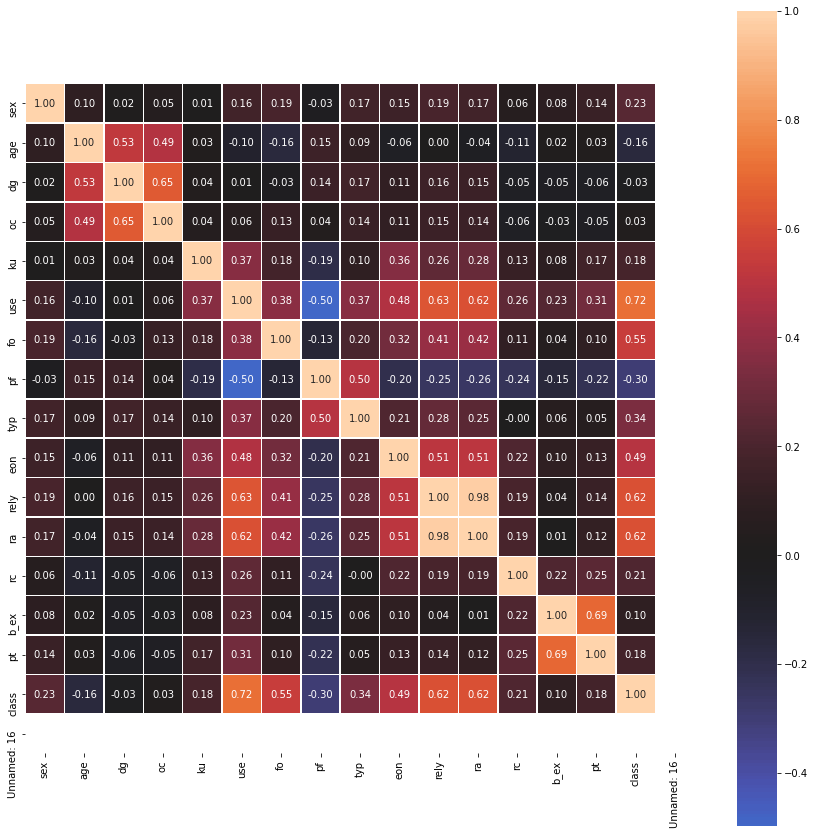

                  sex       age        dg  ...        pt     class  Unnamed: 16
sex          1.000000  0.098087  0.016377  ...  0.136970  0.234140          NaN
age          0.098087  1.000000  0.526865  ...  0.026629 -0.159243          NaN
dg           0.016377  0.526865  1.000000  ... -0.057269 -0.030278          NaN
oc           0.045483  0.488695  0.652617  ... -0.051462  0.028558          NaN
ku           0.005145  0.033165  0.037096  ...  0.168403  0.181283          NaN
use          0.163270 -0.097507  0.008828  ...  0.312872  0.717221          NaN
fo           0.191717 -0.155342 -0.027959  ...  0.098773  0.548385          NaN
pf          -0.027918  0.152626  0.144168  ... -0.217920 -0.299962          NaN
typ          0.173970  0.093787  0.167244  ...  0.052251  0.344142          NaN
eon          0.154269 -0.055285  0.108219  ...  0.130634  0.492695          NaN
rely         0.189372  0.001204  0.155971  ...  0.138906  0.619903          NaN
ra           0.173795 -0.040834  0.14875

In [ ]:
a = df.corr()
plt.figure(figsize=(15, 15))
sns.heatmap(a, vmax=1.0, center=0, fmt='.2f', square=True, linewidth=.5, annot=True)
plt.savefig('correlation.png')
plt.show()

print(a)
threshold=0.5
b = abs(a["class"])
result = b[b > 0.5]
print(result)

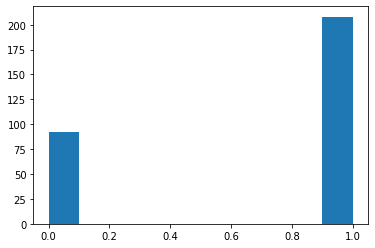

sex    1.0
Name: sex, dtype: float64


In [ ]:
plt.hist(df["sex"])
plt.show()

b = abs(a["sex"])
result = b[b > 0.5]
print(result)

count    300.000000
mean      27.140000
std        9.366581
min       15.000000
25%       22.000000
50%       24.000000
75%       29.000000
max       62.000000
Name: age, dtype: float64


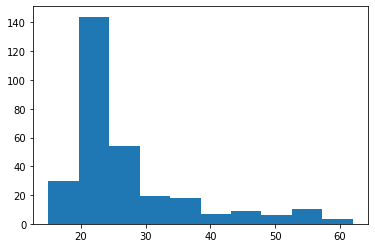

age    1.000000
dg     0.526865
Name: age, dtype: float64


In [ ]:
age = df['age'].describe()
print(age)
plt.hist(df["age"])
plt.show()

b = abs(a["age"])
result = b[b > 0.5]
print(result)

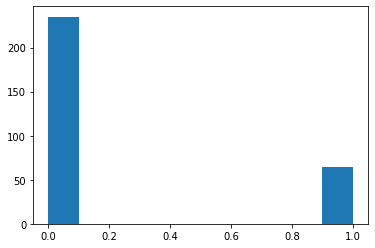

age    0.526865
dg     1.000000
oc     0.652617
Name: dg, dtype: float64


In [ ]:
plt.hist(df["dg"])
plt.show()

b = abs(a["dg"])
result = b[b > 0.5]
print(result)

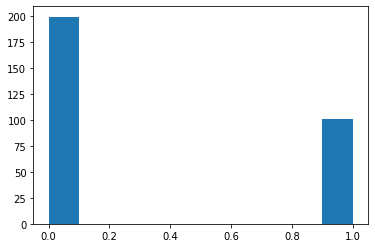

dg    0.652617
oc    1.000000
Name: oc, dtype: float64


In [ ]:
plt.hist(df["oc"])
plt.show()

b = abs(a["oc"])
result = b[b > 0.5]
print(result)

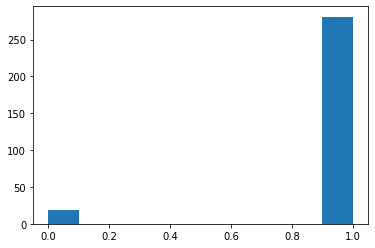

ku    1.0
Name: ku, dtype: float64


In [ ]:
plt.hist(df["ku"])
plt.show()

b = abs(a["ku"])
result = b[b > 0.5]
print(result)

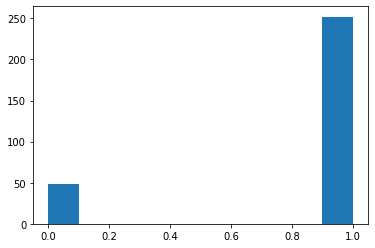

use      1.000000
rely     0.631368
ra       0.617213
class    0.717221
Name: use, dtype: float64


In [ ]:
plt.hist(df["use"])
plt.show()

b = abs(a["use"])
result = b[b > 0.5]
print(result)

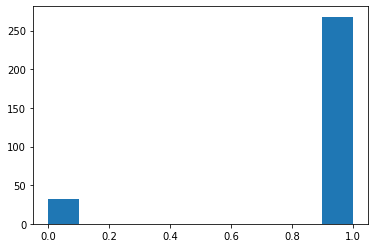

fo       1.000000
class    0.548385
Name: fo, dtype: float64


In [ ]:
plt.hist(df["fo"])
plt.show()

b = abs(a["fo"])
result = b[b > 0.5]
print(result)

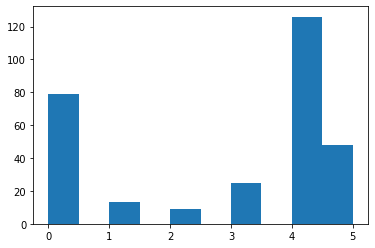

pf    1.0
Name: pf, dtype: float64


In [ ]:
plt.hist(df["pf"])
plt.show()

b = abs(a["pf"])
result = b[b > 0.5]
print(result)

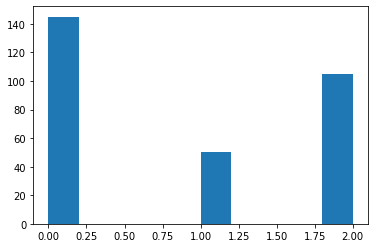

typ    1.0
Name: typ, dtype: float64


In [ ]:
plt.hist(df["typ"])
plt.show()

b = abs(a["typ"])
result = b[b > 0.5]
print(result)

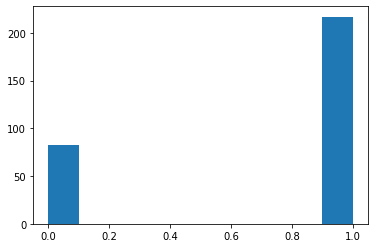

eon     1.000000
rely    0.512365
ra      0.511079
Name: eon, dtype: float64


In [ ]:
plt.hist(df["eon"])
plt.show()

b = abs(a["eon"])
result = b[b > 0.5]
print(result)

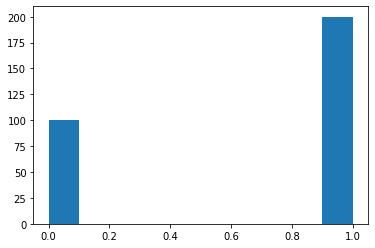

use      0.617213
eon      0.511079
rely     0.977581
ra       1.000000
class    0.624851
Name: ra, dtype: float64


In [ ]:
plt.hist(df["ra"])
plt.show()

b = abs(a["ra"])
result = b[b > 0.5]
print(result)

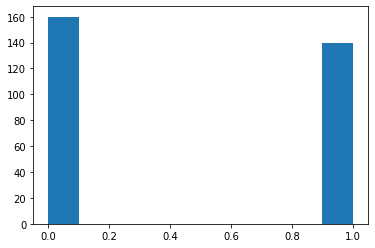

rc    1.0
Name: rc, dtype: float64


In [ ]:
plt.hist(df["rc"])
plt.show()

b = abs(a["rc"])
result = b[b > 0.5]
print(result)

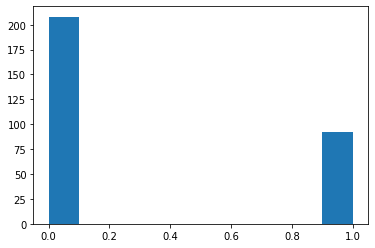

b_ex    1.000000
pt      0.689571
Name: b_ex, dtype: float64


In [ ]:
plt.hist(df["b_ex"])
plt.show()

b = abs(a["b_ex"])
result = b[b > 0.5]
print(result)

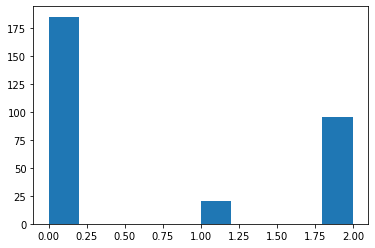

b_ex    0.689571
pt      1.000000
Name: pt, dtype: float64


In [ ]:
plt.hist(df["pt"])
plt.show()

b = abs(a["pt"])
result = b[b > 0.5]
print(result)

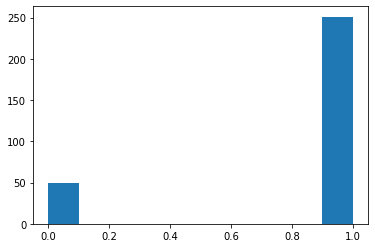

In [ ]:
plt.hist(df["class"])
plt.show()

In [ ]:
numcols = ['class', 'sex', 'age', 'dg', 'oc', 'ku', 'use', 'fo', 'pf', 'typ', 'eon', 'rely', 'ra', 'rc', 'b_ex', 'pt']

In [ ]:
df = df[numcols]

In [ ]:
traindf = df
features = traindf.columns

traindf = traindf.dropna()

In [ ]:
traindf = pd.DataFrame(traindf, columns=features)

In [ ]:
y = traindf['class']
X = traindf.copy()
del X['class']

In [ ]:
feature_name = list(X.columns)
num_feats=10

Pearson

In [ ]:
def cor_selector(X, y,num_feats):
    cor_list = []
    feature_name = X.columns.tolist()
    for i in X.columns.tolist():
        cor = np.corrcoef(X[i], y)[0, 1]
        cor_list.append(cor)
    cor_feature = X.iloc[:,np.argsort(np.abs(cor_list))[-num_feats:]].columns.tolist()
    cor_support = [True if i in cor_feature else False for i in feature_name]
    return cor_support, cor_feature
cor_support, cor_feature = cor_selector(X, y,num_feats)
print(str(len(cor_feature)), 'selected features')
print(cor_feature)

10 selected features
['ku', 'rc', 'sex', 'pf', 'typ', 'eon', 'fo', 'rely', 'ra', 'use']


Chi-Square

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
X_norm = MinMaxScaler().fit_transform(X)
chi_selector = SelectKBest(chi2, k=num_feats)
chi_selector.fit(X_norm, y)
chi_support = chi_selector.get_support()
chi_feature = X.loc[:,chi_support].columns.tolist()
print(str(len(chi_feature)), 'selected features')
print(chi_feature)

10 selected features
['sex', 'use', 'fo', 'pf', 'typ', 'eon', 'rely', 'ra', 'rc', 'pt']


Recursive Feature Elimination

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
rfe_selector = RFE(estimator=LogisticRegression(), n_features_to_select=num_feats, step=5, verbose=5)
rfe_selector.fit(X_norm, y)
rfe_support = rfe_selector.get_support()
rfe_feature = X.loc[:,rfe_support].columns.tolist()
print(str(len(rfe_feature)), 'selected features')
print(rfe_feature)

Fitting estimator with 15 features.
10 selected features
['sex', 'age', 'dg', 'ku', 'use', 'fo', 'typ', 'eon', 'rely', 'ra']


Lasso L1

In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

embeded_lr_selector = SelectFromModel(LogisticRegression(penalty="l1", solver='liblinear'), max_features=num_feats)
embeded_lr_selector.fit(X_norm, y)

SelectFromModel(estimator=LogisticRegression(C=1.0, class_weight=None,
                                             dual=False, fit_intercept=True,
                                             intercept_scaling=1, l1_ratio=None,
                                             max_iter=100, multi_class='auto',
                                             n_jobs=None, penalty='l1',
                                             random_state=None,
                                             solver='liblinear', tol=0.0001,
                                             verbose=0, warm_start=False),
                max_features=10, norm_order=1, prefit=False, threshold=None)

In [ ]:
embeded_lr_support = embeded_lr_selector.get_support()
embeded_lr_feature = X.loc[:,embeded_lr_support].columns.tolist()
print(str(len(embeded_lr_feature)), 'selected features')
print(embeded_lr_feature)

10 selected features
['sex', 'dg', 'oc', 'ku', 'use', 'fo', 'typ', 'eon', 'ra', 'b_ex']


Tree-Based: RandomForest

In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

embeded_rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=100), max_features=num_feats)
embeded_rf_selector.fit(X, y)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                                 class_weight=None,
                                                 criterion='gini',
                                                 max_depth=None,
                                                 max_features='auto',
                                                 max_leaf_nodes=None,
                                                 max_samples=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100, n_jobs=None,
                                                 oob_score=False,

In [ ]:
embeded_rf_support = embeded_rf_selector.get_support()
embeded_rf_feature = X.loc[:,embeded_rf_support].columns.tolist()
print(str(len(embeded_rf_feature)), 'selected features')
print(embeded_rf_feature)

6 selected features
['age', 'use', 'fo', 'pf', 'eon', 'ra']


Univariate Selection

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

bestfeatures = SelectKBest(score_func=chi2, k=15 )
fit = bestfeatures.fit(X, y)

In [ ]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [ ]:
featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ['Attribute', 'Score']

In [ ]:
print(featureScores.nlargest(10, 'Score'))

   Attribute      Score
11        ra  39.043825
10      rely  37.275091
7         pf  34.350234
8        typ  33.434738
5        use  24.691485
1        age  24.510161
9        eon  20.148088
14        pt  11.669590
6         fo   9.623226
12        rc   7.360413


Information Gain

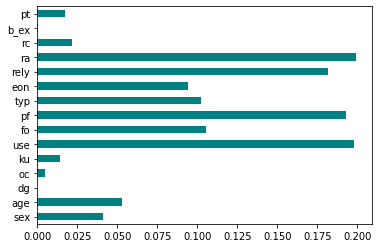

In [ ]:
importances = mutual_info_classif(X, y)
feat_importances = pd.Series(importances, X.columns[0:len(X.columns)])
feat_importances.plot(kind='barh', color="teal")
plt.show()

Final Result of Feature Selection

In [ ]:
num_feats=10
pd.set_option('display.max_rows', None)
feature_selection_df = pd.DataFrame(
                                    {
                                        'Feature':feature_name, 
                                        'Pearson':cor_support, 
                                        'Chi-2':chi_support, 
                                        'RFE':rfe_support, 
                                        'Logistics':embeded_lr_support,
                                        'Random Forest':embeded_rf_support,
                                     }
                                    )
feature_selection_df['Total'] = np.sum(feature_selection_df, axis=1)
feature_selection_df = feature_selection_df.sort_values(['Total','Feature'] , ascending=False)
feature_selection_df.index = range(1, len(feature_selection_df)+1)
feature_selection_df.head(num_feats)

,Feature,Pearson,Chi-2,RFE,Logistics,Random Forest,Total
1,use,True,True,True,True,True,5
2,ra,True,True,True,True,True,5
3,fo,True,True,True,True,True,5
4,eon,True,True,True,True,True,5
5,typ,True,True,True,True,False,4
6,sex,True,True,True,True,False,4
7,rely,True,True,True,False,False,3
8,pf,True,True,False,False,True,3
9,ku,True,False,True,True,False,3
10,rc,True,True,False,False,False,2


Logistic Regression

In [ ]:
feature_cols = ['use', 'ra', 'fo', 'typ']
X = df[feature_cols]
y = df['class']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
acc=0
pre=0
re=0
f1=0
for i in range(0, 100):
  m1 = LogisticRegression()
  m1.fit(X_train,y_train)
  y_pred = m1.predict(X_test)
  accuracy = metrics.accuracy_score(y_test, y_pred)
  precision = metrics.precision_score(y_test, y_pred)
  recall = metrics.recall_score(y_test, y_pred)
  f1score = metrics.f1_score(y_test, y_pred)
  if accuracy>acc:
    acc=accuracy
  if precision>pre:
    pre=precision
  if recall>re:
    re=recall
  if f1score>f1:
    f1=f1score

In [ ]:
print("Accuracy: %f" %acc)
print("Precision: %f" %pre )
print("Recall: %f" %re )
print("F1 Score: %f" %f1 )

Accuracy: 0.960000
Precision: 0.984375
Recall: 0.969231
F1 Score: 0.976744


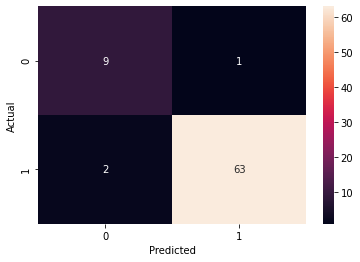

In [ ]:
c1 = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(c1, annot=True)
plt.show()

Random Forest

In [ ]:
feature_cols = ['use', 'ra', 'fo', 'typ']
X = df[feature_cols]
y = df['class']

In [ ]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X,y,test_size=0.25,random_state=0)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
acc=0
pre=0
re=0
f1=0
for i in range(0, 100):
  m2 = RandomForestClassifier(n_estimators=100)
  m2.fit(X_train2,y_train2)
  y_pred2 = m2.predict(X_test2)
  accuracy = metrics.accuracy_score(y_test2, y_pred2)
  precision = metrics.precision_score(y_test2, y_pred2)
  recall = metrics.recall_score(y_test2, y_pred2)
  f1score = metrics.f1_score(y_test2, y_pred2)
  if accuracy>acc:
    acc=accuracy
  if precision>pre:
    pre=precision
  if recall>re:
    re=recall
  if f1score>f1:
    f1=f1score

In [ ]:
print("Accuracy: %f" %acc)
print("Precision: %f" %pre )
print("Recall: %f" %re )
print("F1 Score: %f" %f1 )

Accuracy: 0.960000
Precision: 0.984375
Recall: 0.969231
F1 Score: 0.976744


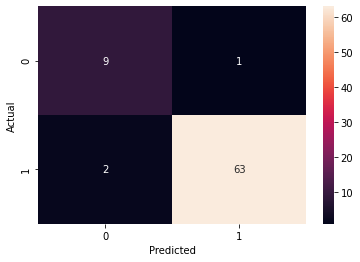

In [ ]:
c2 = pd.crosstab(y_test2, y_pred2, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(c2, annot=True)
plt.savefig('randomMatrix.png')
plt.show()

Decision Tree

In [ ]:
feature_cols = ['use', 'ra', 'fo', 'typ']
X = df[feature_cols]
y = df['class']

In [ ]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X,y,test_size=0.25,random_state=0)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
acc=0
pre=0
re=0
f1=0
for i in range(0, 100):
  m3 = DecisionTreeClassifier(criterion="entropy", splitter="random", min_samples_split=50)
  m3.fit(X_train3,y_train3)
  y_pred3 = m3.predict(X_test3)
  accuracy = metrics.accuracy_score(y_test3, y_pred3)
  precision = metrics.precision_score(y_test3, y_pred3)
  recall = metrics.recall_score(y_test3, y_pred3)
  f1score = metrics.f1_score(y_test3, y_pred3)
  if accuracy>acc:
    acc=accuracy
  if precision>pre:
    pre=precision
  if recall>re:
    re=recall
  if f1score>f1:
    f1=f1score

In [ ]:
print("Accuracy: %f" %acc)
print("Precision: %f" %pre )
print("Recall: %f" %re )
print("F1 Score: %f" %f1 )

Accuracy: 0.933333
Precision: 0.954545
Recall: 0.969231
F1 Score: 0.961832


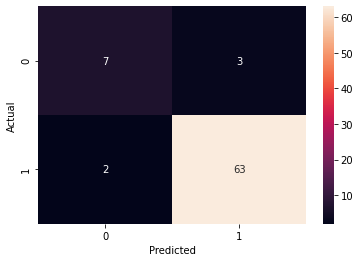

In [ ]:
c3 = pd.crosstab(y_test3, y_pred3, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(c3, annot=True)
plt.show()

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


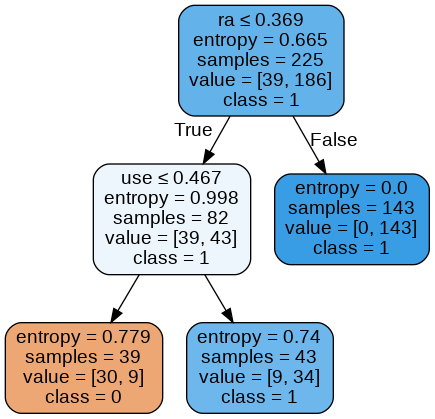

In [ ]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(m3, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('kidney.png')
Image(graph.create_png())

Naive Bayes Gaussian

In [ ]:
feature_cols = ['use', 'ra', 'fo', 'typ']
X = df[feature_cols]
y = df['class']

In [ ]:
X_train4, X_test4, y_train4, y_test4 = train_test_split(X,y,test_size=0.25,random_state=0)

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
acc=0
pre=0
re=0
f1=0
for i in range(0, 100):
  m4 = GaussianNB()
  m4.fit(X_train4,y_train4)
  y_pred4 = m4.predict(X_test4)
  accuracy = metrics.accuracy_score(y_test4, y_pred4)
  precision = metrics.precision_score(y_test4, y_pred4)
  recall = metrics.recall_score(y_test4, y_pred4)
  f1score = metrics.f1_score(y_test4, y_pred4)
  if accuracy>acc:
    acc=accuracy
  if precision>pre:
    pre=precision
  if recall>re:
    re=recall
  if f1score>f1:
    f1=f1score

In [ ]:
print("Accuracy: %f" %acc)
print("Precision: %f" %pre )
print("Recall: %f" %re )
print("F1 Score: %f" %f1 )

Accuracy: 0.893333
Precision: 1.000000
Recall: 0.876923
F1 Score: 0.934426


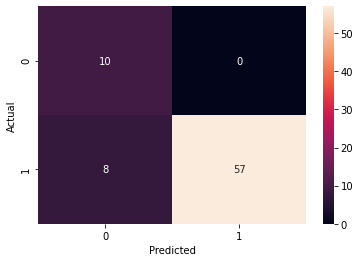

In [ ]:
c4 = pd.crosstab(y_test4, y_pred4, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(c4, annot=True)
plt.show()

KNN

In [ ]:
feature_cols = ['use', 'ra', 'fo', 'typ']
X = df[feature_cols]
y = df['class']

In [ ]:
X_train5, X_test5, y_train5, y_test5 = train_test_split(X,y,test_size=0.25,random_state=0)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
acc=0
pre=0
re=0
f1=0
for i in range(0, 100):
  m5 = KNeighborsClassifier(n_neighbors=5)
  m5.fit(X_train5,y_train5)
  y_pred5 = m5.predict(X_test5)
  accuracy = metrics.accuracy_score(y_test5, y_pred5)
  precision = metrics.precision_score(y_test5, y_pred5)
  recall = metrics.recall_score(y_test5, y_pred5)
  f1score = metrics.f1_score(y_test5, y_pred5)
  if accuracy>acc:
    acc=accuracy
  if precision>pre:
    pre=precision
  if recall>re:
    re=recall
  if f1score>f1:
    f1=f1score

In [ ]:
print("Accuracy: %f" %acc)
print("Precision: %f" %pre )
print("Recall: %f" %re )
print("F1 Score: %f" %f1 )

Accuracy: 0.960000
Precision: 0.984375
Recall: 0.969231
F1 Score: 0.976744


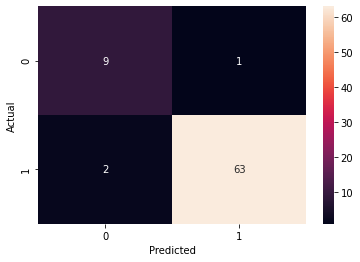

In [ ]:
c5 = pd.crosstab(y_test5, y_pred5, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(c5, annot=True)
plt.show()

SVM

In [ ]:
feature_cols = ['use', 'ra', 'fo', 'typ']
X = df[feature_cols]
y = df['class']

In [ ]:
X_train6, X_test6, y_train6, y_test6 = train_test_split(X,y,test_size=0.25,random_state=0)

In [ ]:
from sklearn import svm

In [ ]:
acc=0
pre=0
re=0
f1=0
for i in range(0, 100):
  m6 = svm.SVC(kernel='linear', C=1, gamma=10, probability=True)
  m6.fit(X_train6,y_train6)
  y_pred6 = m6.predict(X_test6)
  accuracy = metrics.accuracy_score(y_test6, y_pred6)
  precision = metrics.precision_score(y_test6, y_pred6)
  recall = metrics.recall_score(y_test6, y_pred6)
  f1score = metrics.f1_score(y_test6, y_pred6)
  if accuracy>acc:
    acc=accuracy
  if precision>pre:
    pre=precision
  if recall>re:
    re=recall
  if f1score>f1:
    f1=f1score

In [ ]:
print("Accuracy: %f" %acc)
print("Precision: %f" %pre )
print("Recall: %f" %re )
print("F1 Score: %f" %f1 )

Accuracy: 0.933333
Precision: 0.954545
Recall: 0.969231
F1 Score: 0.961832


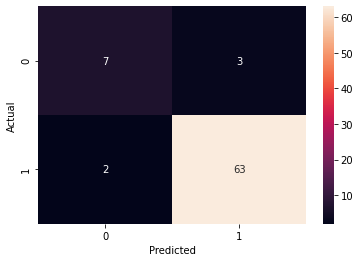

In [ ]:
c6 = pd.crosstab(y_test6, y_pred6, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(c6, annot=True)
plt.show()

Pie chart on test and train dataset

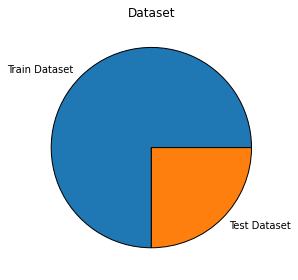

In [ ]:
slices = [75, 25]
labels = ['Train Dataset', 'Test Dataset']

plt.pie(slices, labels=labels, wedgeprops={'edgecolor':'black'})

plt.title('Dataset')
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
X_train6, X_test6, y_train6, y_test6 = train_test_split(X,y,test_size=0.25,random_state=0)

In [ ]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)

In [ ]:
acc=0
pre=0
re=0
f1=0
for i in range(0, 100):
  clf.fit(X_train6,y_train6)
  y_pred6 = clf.predict(X_test6)
  accuracy = metrics.accuracy_score(y_test6, y_pred6)
  precision = metrics.precision_score(y_test6, y_pred6)
  recall = metrics.recall_score(y_test6, y_pred6)
  f1score = metrics.f1_score(y_test6, y_pred6)
  if accuracy>acc:
    acc=accuracy
  if precision>pre:
    pre=precision
  if recall>re:
    re=recall
  if f1score>f1:
    f1=f1score

In [ ]:
print("Accuracy: %f" %acc)
print("Precision: %f" %pre )
print("Recall: %f" %re )
print("F1 Score: %f" %f1 )

Accuracy: 0.866667
Precision: 0.866667
Recall: 1.000000
F1 Score: 0.928571


Data analysis prat

In [ ]:
feature_cols = ['use', 'ra', 'fo', 'typ','class']
mainDataset= df[feature_cols]

class1Len = mainDataset['class'].tolist().count(1)
class0Len = mainDataset['class'].tolist().count(0)
print(class1Len*100/300)
print(class0Len*100/300)

use11 = mainDataset.loc[ (mainDataset['use']==1) & (mainDataset['class'] == 1)] 
use11Len = len(use11)
use11Percent =  ((use11Len*100)/class1Len)
print('use1 also class 1: ',use11Percent)
print('use1 but class 0: ', 100-use11Percent)

use00 = mainDataset.loc[ (mainDataset['use']==0) & (mainDataset['class'] == 0)] 
use00Len = len(use00)
use00Percent =  ((use00Len*100)/class0Len)
print('use0 aslo class 0: ' ,use00Percent)
print('use0 but class 1: ',100-use00Percent)



83.66666666666667
16.333333333333332
use1 also class 1:  95.61752988047809
use1 but class 0:  4.382470119521912
use0 aslo class 0:  75.51020408163265
use0 but class 1:  24.48979591836735


In [ ]:
ra11 = mainDataset.loc[ (mainDataset['ra']==1) & (mainDataset['class'] == 1)] 
ra11Len = len(ra11)
ra11Percent =  ((ra11Len*100)/class1Len)
print('ra1 also class 1: ',ra11Percent)
print('ra1 but class 0: ', 100-ra11Percent)

ra00 = mainDataset.loc[ (mainDataset['ra']==0) & (mainDataset['class'] == 0)] 

ra00Len = len(ra00)
ra00Percent =  ((ra00Len*100)/class0Len)
print('ra0 aslo class 0: ' ,ra00Percent)
print('ra0 but class 1: ',100-ra00Percent)

ra1 also class 1:  79.6812749003984
ra1 but class 0:  20.318725099601593
ra0 aslo class 0:  100.0
ra0 but class 1:  0.0


In [ ]:
fo11 = mainDataset.loc[ (mainDataset['fo']==1) & (mainDataset['class'] == 1)] 
fo11Len = len(fo11)
fo11Percent =  ((fo11Len*100)/class1Len)
print('fo1 also class 1: ',fo11Percent)
print('fo1 but class 0: ', 100-fo11Percent)

fo00 = mainDataset.loc[ (mainDataset['fo']==0) & (mainDataset['class'] == 0)] 

fo00Len = len(fo00)
fo00Percent =  ((fo00Len*100)/class0Len)
print('fo0 aslo class 0: ' ,fo00Percent)
print('fo0 but class 1: ',100-fo00Percent)

fo1 also class 1:  96.81274900398407
fo1 but class 0:  3.1872509960159334
fo0 aslo class 0:  48.97959183673469
fo0 but class 1:  51.02040816326531


In [ ]:
typ11 = mainDataset.loc[ (mainDataset['typ']==1) & (mainDataset['class'] == 1)] 
typ11Len = len(typ11)
typ11Percent =  ((typ11Len*100)/class1Len)
print('typ1 also class 1: ',typ11Percent)
print('typ1 but class 0: ', 100-typ11Percent)

typ00 = mainDataset.loc[ (mainDataset['typ']==0) & (mainDataset['class'] == 0)] 

typ00Len = len(typ00)
typ00Percent =  ((typ00Len*100)/class0Len)
print('typ0 aslo class 0: ' ,typ00Percent)
print('typ0 but class 1: ',100-typ00Percent)

typ1 also class 1:  19.9203187250996
typ1 but class 0:  80.0796812749004
typ0 aslo class 0:  91.83673469387755
typ0 but class 1:  8.163265306122454
